## Context

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.



## Objective

To perform clustering on the products based on various factors


## Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

In [21]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
data = pd.read_csv("data_add_nik.csv")

In [23]:
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [25]:
data.nunique()

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               5
Rating             32
Reviews           102
dtype: int64

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3268.0,6868.020196,4724.659386,0.0,4299.0,5999.0,8999.0,29999.0
Sale Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,26.875765,22.633487,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


- Sales price seem to be right skewed as the Max, is quite large as compared to the mean which signifies the presence of the higher end products. 
- Discount seem to be left skewed and signifies variety of discounts are provided on variety of products from no discount to max of 60% discount. 
- Rating also seem to be left skewed and with average rating of 3.5 and maximum of 5. 
- Minimum of Listing Price is 0 which is not possible and we have to replace that. 

#### Let's check the rows where listing price is 0.

In [27]:
data[(data['Listing Price'] == 0)]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...,...
3257,Air Jordan 5 Retro,CD2722-001,0,15995,0,Nike,3.3,3
3258,Nike ZoomX Vaporfly NEXT%,AO4568-600,0,19995,0,Nike,4.7,45
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,3.0,1


- **If listing price is 0, the discount also seem to be 0.** Hence we can try replacing listing price of these rows with the sales price. 

In [28]:
#Exploring where the listing price is 0. 
data.loc[(data['Listing Price'] == 0), ["Listing Price"]] = data.loc[
    (data['Listing Price'] == 0), ["Sale Price"]
].values

### Question 1: Analyze the histogram of Sales price. 

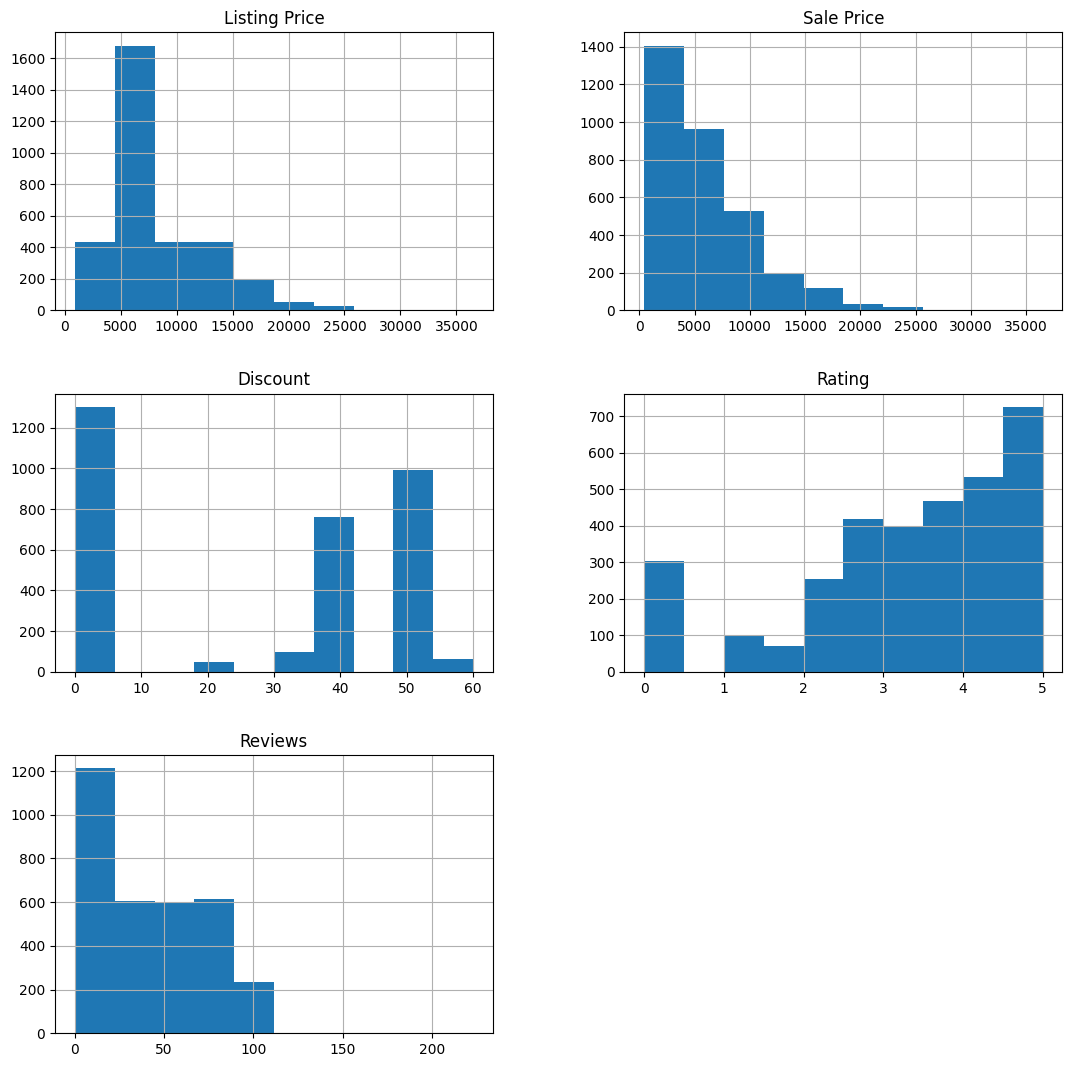

In [29]:
data.hist(figsize=(13,13))
plt.show()

In [30]:
data.Brand.value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

- **There is a outlier Adidas Adidas ORIGINALS**, this can be replaced by Adidas ORIGINALS

In [31]:
data.Brand=data.Brand.replace({'Adidas Adidas ORIGINALS':'Adidas ORIGINALS'})

### Prepare data for Clustering

In [32]:
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [33]:
# Drop the column Product name, product id, brand and reviews. 
data_new = data.drop(columns=['Product ID', 'Product Name', 'Brand', 'Reviews'])

#scaling the rest of the data
scaler=StandardScaler()

data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()

,Listing Price,Sale Price,Discount,Rating
0,1.509415,0.317928,1.021839,1.090476
1,-0.165605,-0.544022,1.021839,0.040524
2,-1.659542,-1.289493,0.579948,-0.449453
3,-0.301417,-0.613910,1.021839,0.600498
4,-0.075063,-0.497431,1.021839,0.180518


In [34]:
data_scaled_copy = data_scaled.copy(deep=True)

### Question 2: Fitting the K-Means Clustering and plotting Elbow plot

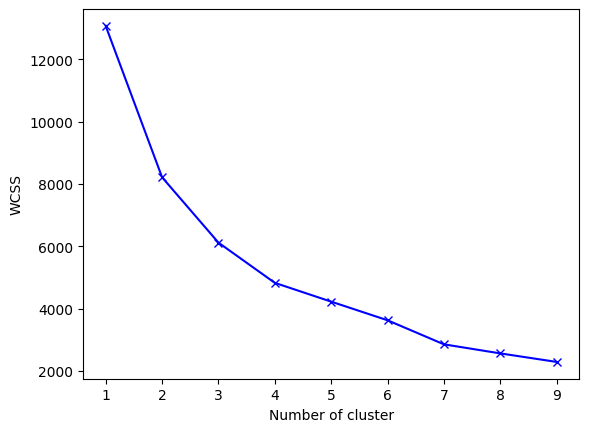

In [36]:
#Empty dictionary to store the SSE for each value of k
WCSS = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled_copy)
    WCSS[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

- It is hard to tell from this graph what will be the optimal value of K. Let's use silhouette score to visualize this

### Question 3: Checking the Silhouette Score and choosing optimal value for K

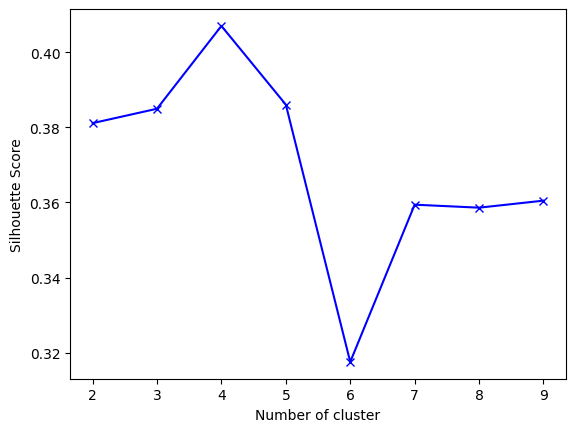

In [38]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled_copy)
    labels = kmeans.predict(data_scaled_copy)
    sc[k] = silhouette_score(data_scaled_copy, labels)

plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [40]:
data['KMeans_Labels'].value_counts()

KMeans_Labels
0    1775
1     743
3     409
2     341
Name: count, dtype: int64

### Question 4 and 5 : Cluster profiling

In [49]:
data = data.drop(columns=['Product ID', 'Product Name', 'Brand', 'Reviews'])
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean','group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median','group_3 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
Listing Price,6852.633803,7111.969044,8793.357771,16572.889976,5999.0,7595.0,7995.0,15995.0
Sale Price,3717.585915,6689.777927,7366.695015,14585.616137,3499.0,6995.0,7199.0,13597.0
Discount,45.374648,0.619112,10.293255,8.117359,50.0,0.0,0.0,0.0
Rating,3.448056,3.891925,0.251906,3.660880,3.5,4.0,0.0,4.0


### Note: You can also apply other clustering algorithms and can compare different clusters. You can refer to the practice or MLS Notebooks of the code of other algorithms. 

### Happy Learning!